## NLP Homework

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_ellipsoid(P, C):   # P : The ellipsoid is defined by the inverse of P; C : Centre of the ellipsoid
    # compute the inverse matrix
    M = np.linalg.inv(P)
    # compute the eigenvalues and eigenvectors
    D, V = np.linalg.eig(M)
    # check if the matrix is positive definite or not
    if (D <= 0).any(): 
        raise ValueError("Parameter matrix is not positive definite!")
        
    # for 2x2 matrix
    if P.shape == (2, 2):
        # compute the semi-major axes 
        rx, ry = np.sqrt(1 / D)

        # Set of all spherical angles:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        # Cartesian coordinates that correspond to the spherical angles:
        # (this is the equation of an ellipsoid):
        x1 = rx * np.outer(np.cos(u), np.sin(v))
        y1 = ry * np.outer(np.sin(u), np.sin(v))
        # keeping the z coordinates at 0
        z0 = 0 * np.outer(np.ones_like(u), np.cos(v))
        
        # new matrix to compute original coordinate points
        r1 = np.array([x1, y1])
        x0, y0 = (V @ r1.reshape(2, -1)).reshape(r1.shape)
        x0 = x0 + C[0] * np.ones_like(x0)
        y0 = y0 + C[1] * np.ones_like(y0)
        
    else:
        # compute the semi-major axes 
        rx, ry, rz = np.sqrt(1 / D)

        # Set of all spherical angles:
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        # Cartesian coordinates that correspond to the spherical angles:
        # (this is the equation of an ellipsoid):
        x1 = rx * np.outer(np.cos(u), np.sin(v))
        y1 = ry * np.outer(np.sin(u), np.sin(v))
        z1 = rz * np.outer(np.ones_like(u), np.cos(v))

        r1 = np.array([x1, y1, z1])
        x0, y0, z0 = (V @ r1.reshape(3, -1)).reshape(r1.shape)
        x0 = x0 + C[0] * np.ones_like(x0)
        y0 = y0 + C[1] * np.ones_like(y0)
        z0 = z0 + C[2] * np.ones_like(z0)

    # Plot:
    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x0, y0, z0,  rstride=4, cstride=4, color='b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Adjustment of the axes, so that they all have the same span:
    max_radius = max(rx, ry)
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

    plt.show()

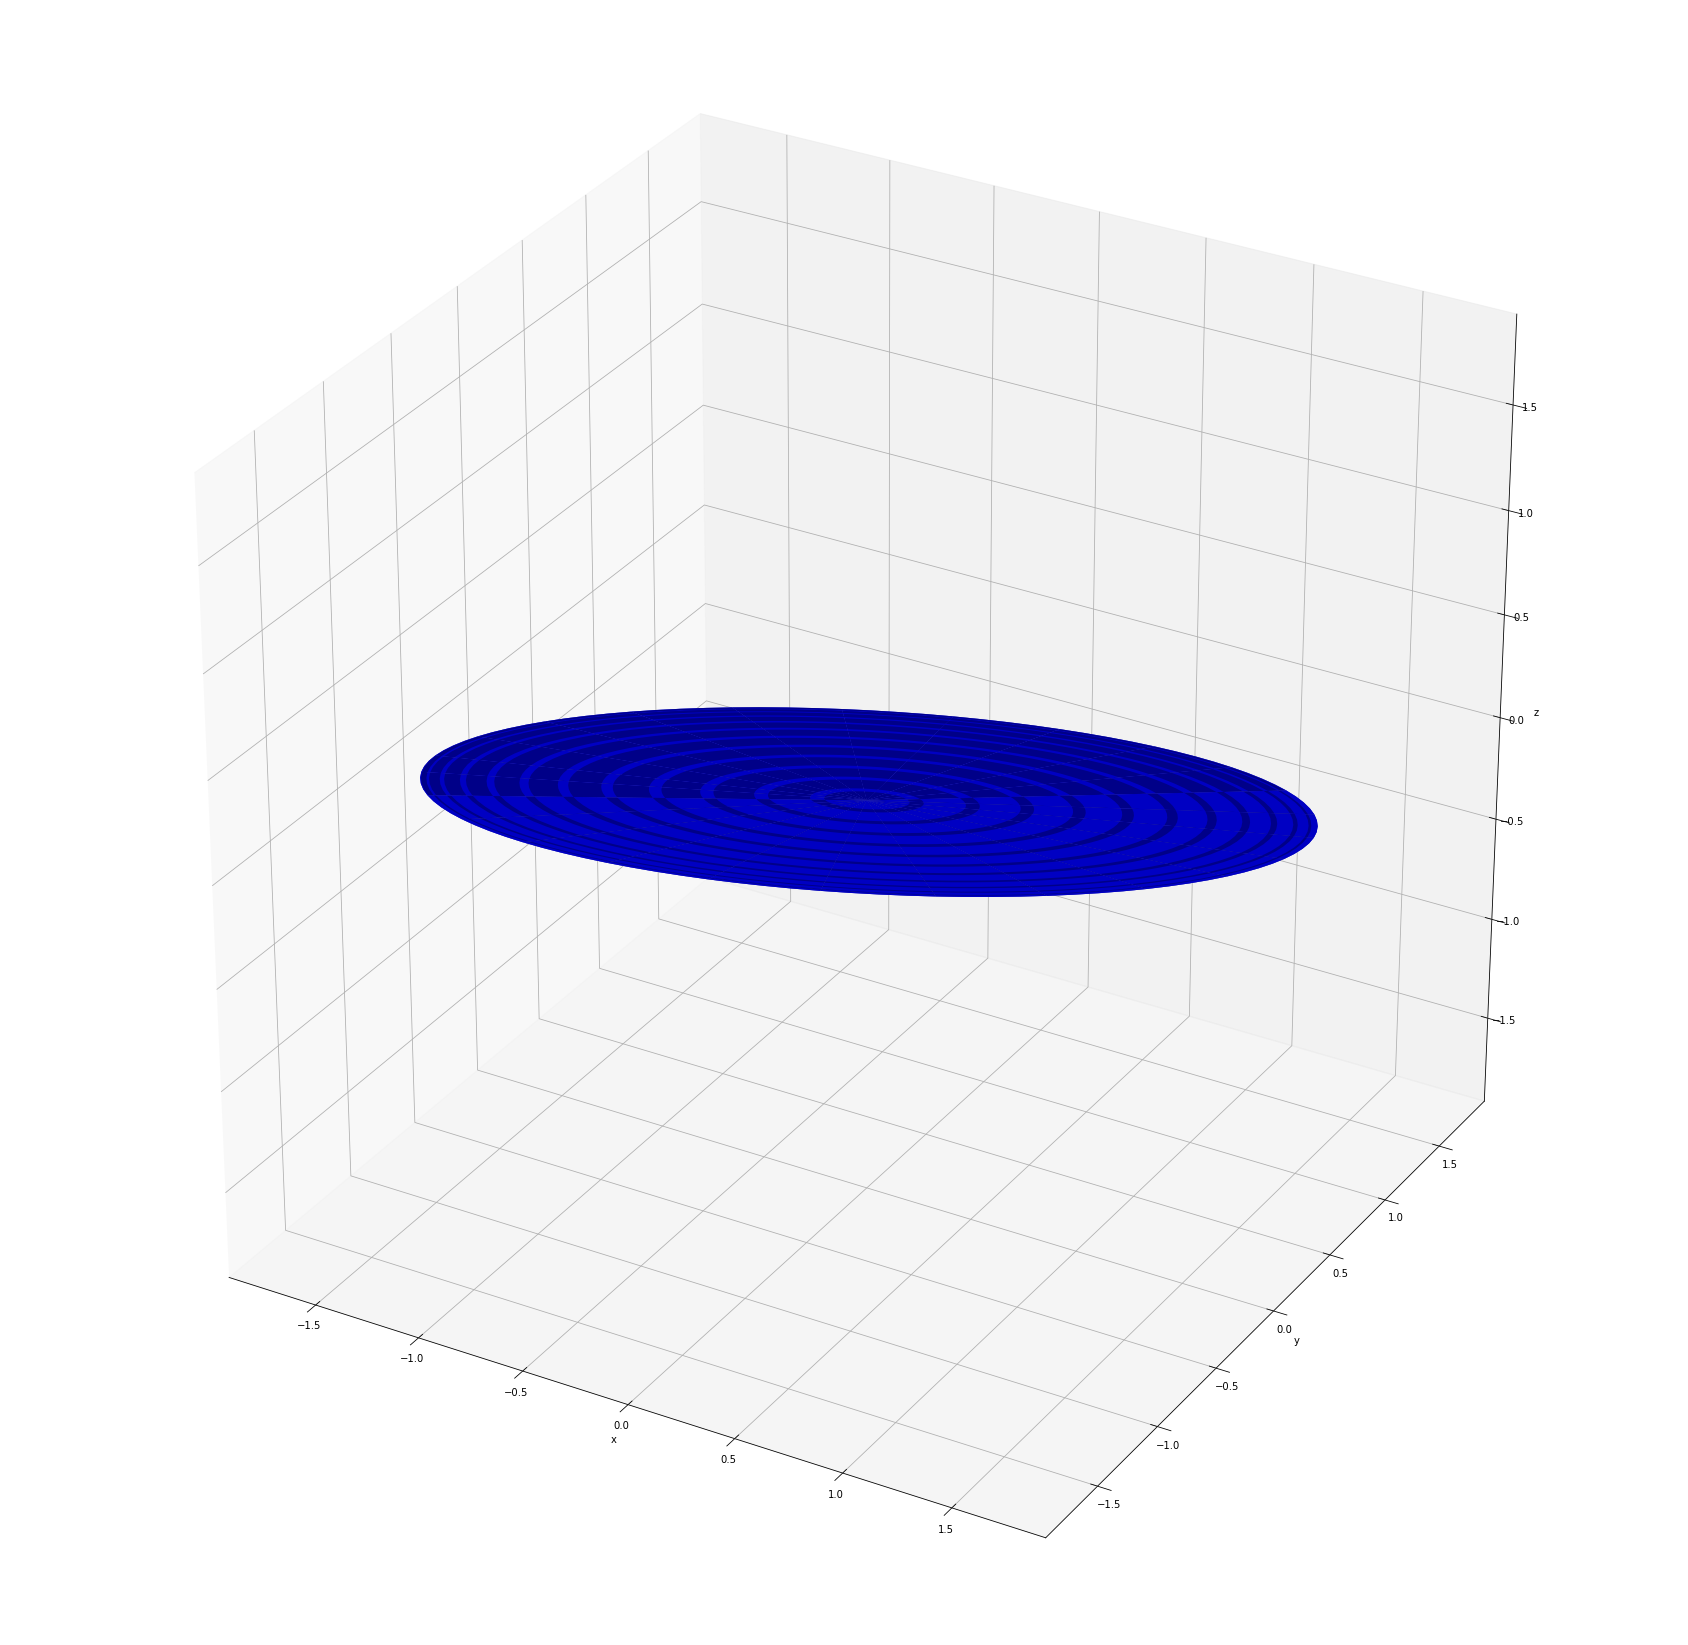

In [2]:
P = np.array([[3, 1],
              [1, 1]])

C = np.array([0, 0])

draw_ellipsoid(P, C)

### Question 2

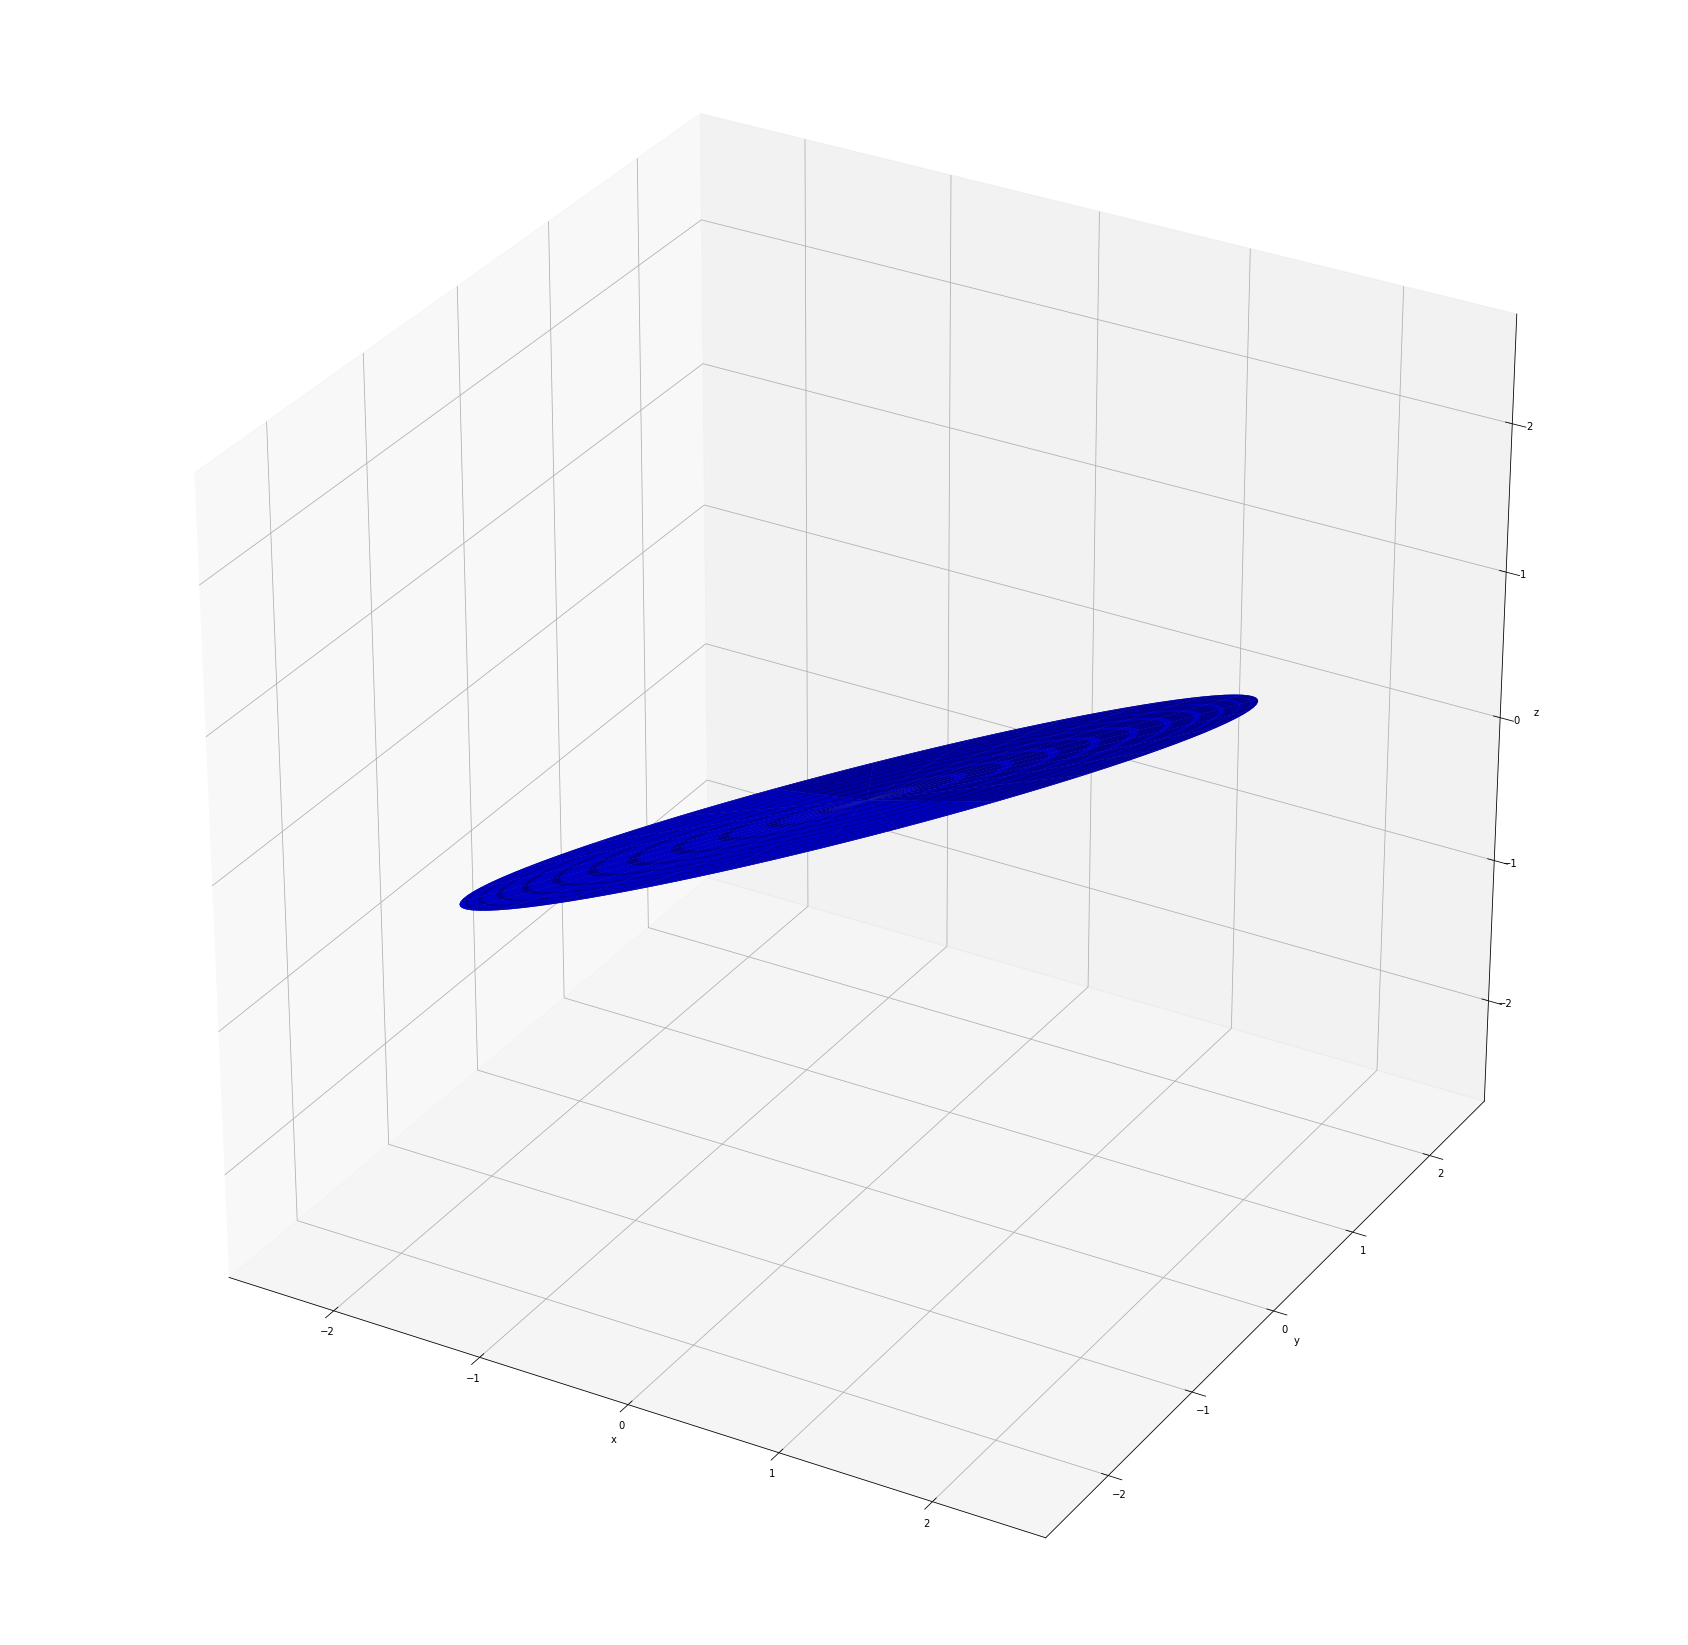

In [3]:
A = np.array([[1, 1],
              [2, 1]])

P = np.matmul(A, np.transpose(A))
C = np.array([0, 0])

draw_ellipsoid(P, C)

### Question 3

The set S = {Au : ||u|| <= 1} is an ellipsoid centred at origin.

The defining matrix is P, where P^(1/2) = A, and by using the inverse of P, the ellipsoid is drawn.

In [4]:
A = np.array([[1, 1],
              [2, 1]])

P = np.matmul(A, np.transpose(A))

P

array([[2, 3],
       [3, 5]])

### Extra

One example for 3x3 matrix.

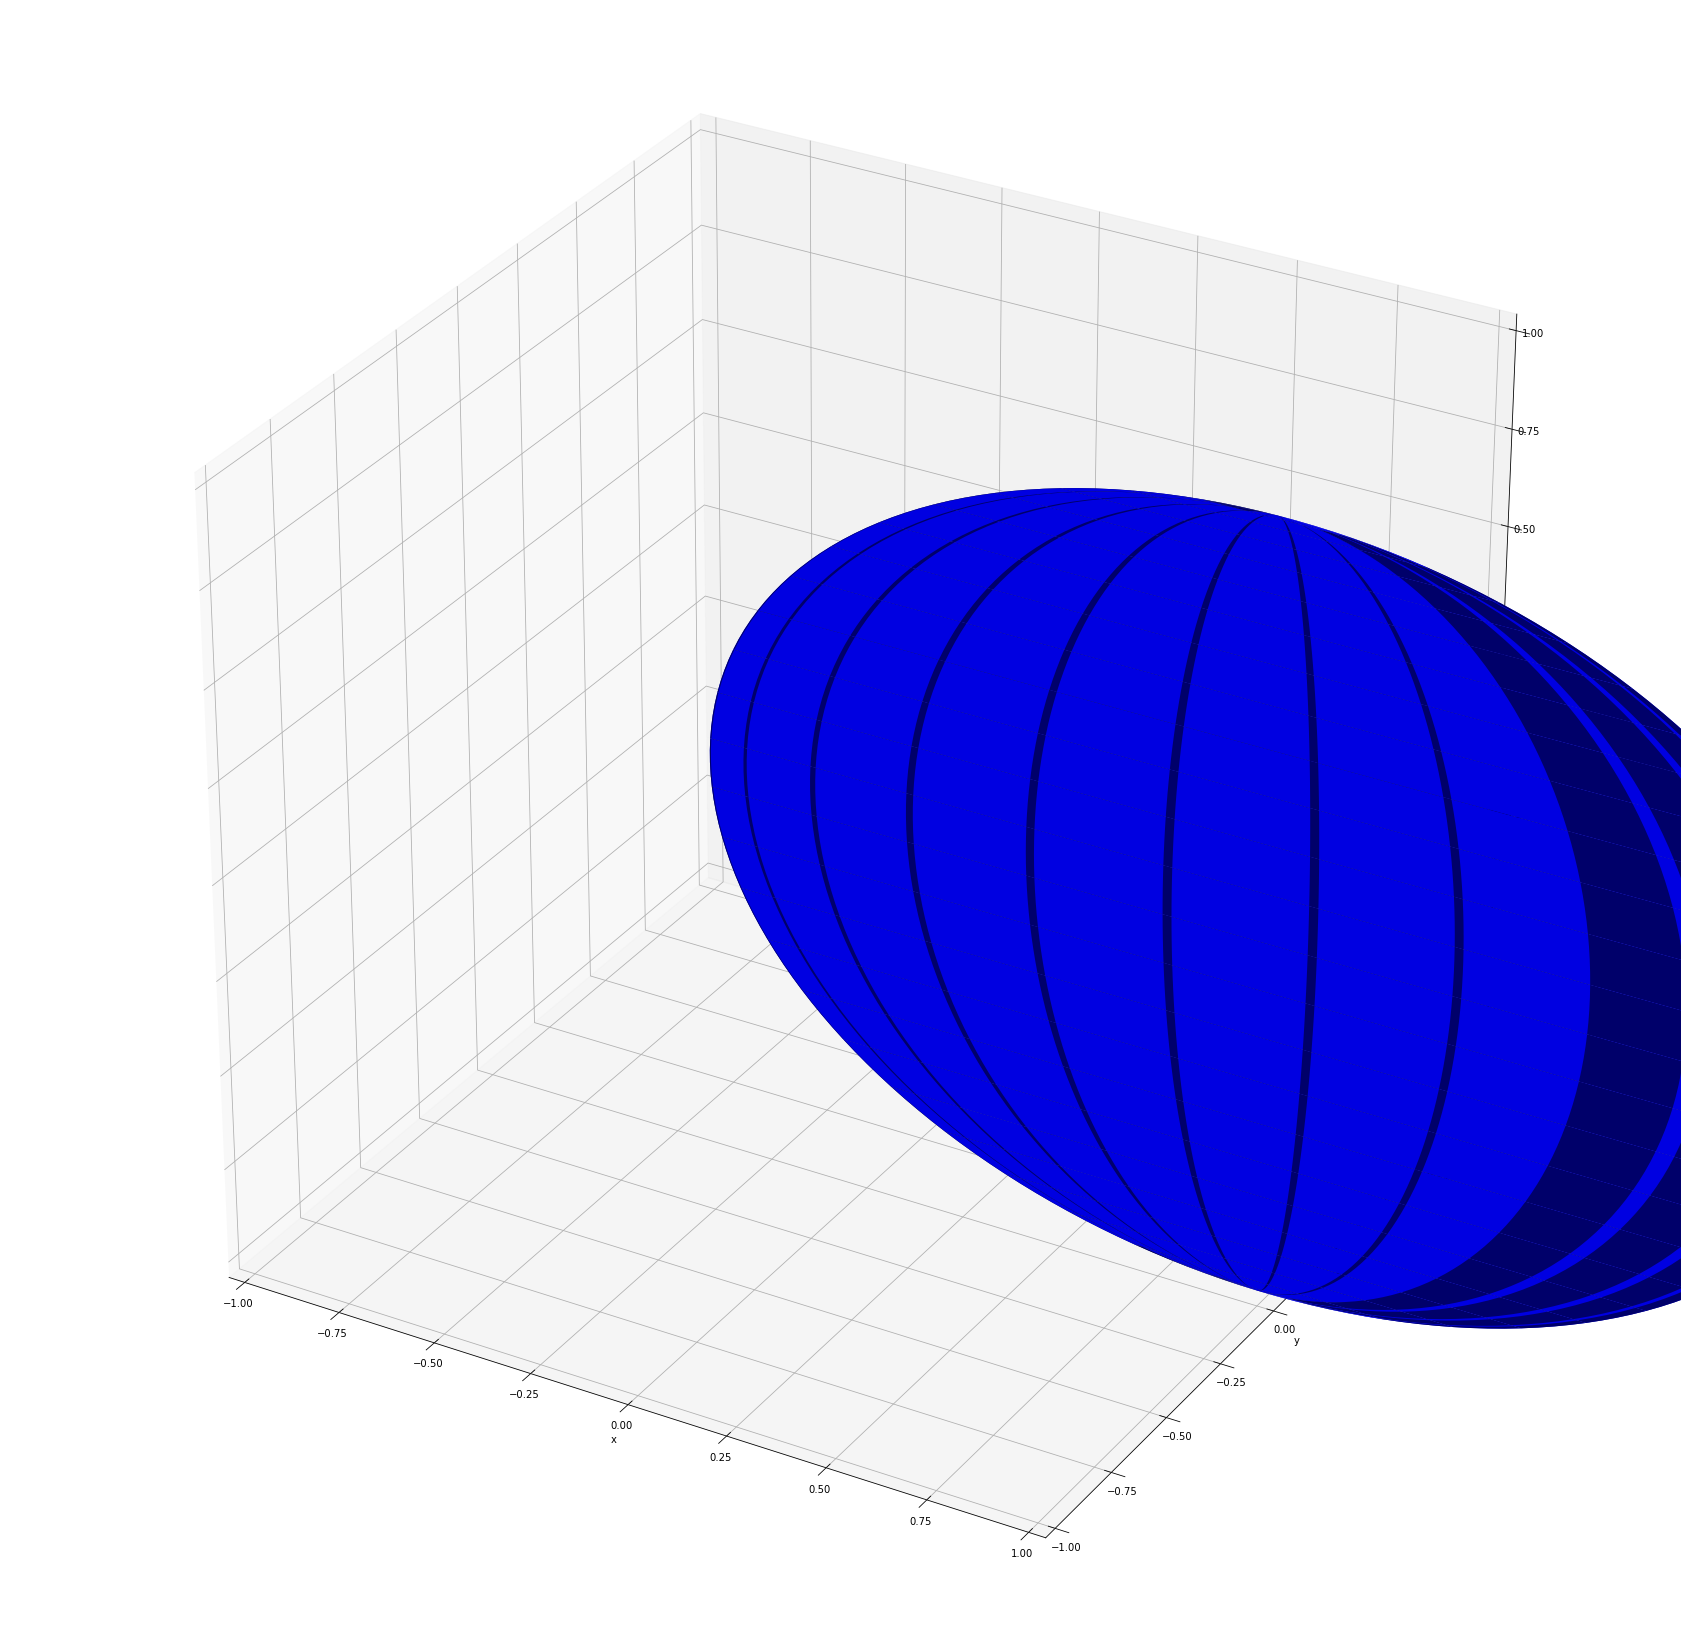

In [32]:
Q = np.array([[1, 1, 0],
              [0, 1, 0],
              [0, 0, 1]])

C = np.array([1, 0, 0])
draw_ellipsoid(Q, C)